In [678]:
import mlrose
import numpy as np
import nltk
import matplotlib.pyplot as plt
nltk.download('words')
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import validation_curve

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Karan\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [660]:
def random_mat(state):
    rand_mat = np.reshape(state, (10,10))
    rand_mat_eig = np.linalg.eigh(rand_mat)[0]
    sorted_eig = sorted(rand_mat_eig)
    diffs_eig = [abs(j-i) for i,j in zip(rand_mat_eig, rand_mat_eig[1:])]
    sd_eig = 1/np.std(diffs_eig)
    return sd_eig

In [185]:
def sudoku(state):
    sud = np.reshape(state, (9,9))
    count = 0
    for row in sud:
        count += len(np.unique(row))
    for row in np.transpose(sud):
        count += len(np.unique(sud))
    return count

#what about subgrids?

In [711]:
rand_line = np.random.randint(0,2,100)
rand_sud = np.random.randint(1,9,81)
rand_word = np.random.randint(0,2, 32)
rand_queens = np.random.randint(0, 8, 8)

In [674]:
def rand_hill_climb(fitness_fn, state, length, max_val, restarts):
    fit = mlrose.CustomFitness(fitness_fn = fitness_fn, problem_type = "discrete")
    prob = mlrose.DiscreteOpt(length = length, fitness_fn = fit, maximize = True, max_val = max_val)
    best_state, best_array, curve = mlrose.random_hill_climb(problem = prob, init_state=state, curve = True, restarts = restarts)
    return best_state, best_array, curve

def ticgene(fitness_fn, state, length, max_val, mutation_prob):
    fit = mlrose.CustomFitness(fitness_fn = fitness_fn, problem_type = "discrete")
    prob = mlrose.DiscreteOpt(length = length, fitness_fn = fit, maximize = True, max_val = max_val)
    best_state, best_array, curve = mlrose.genetic_alg(problem = prob, curve = True, mutation_prob = mutation_prob)
    return best_state, best_array, curve

def sim_anneal(fitness_fn, state, length, max_val, schedule):
    fit = mlrose.CustomFitness(fitness_fn = fitness_fn, problem_type = "discrete")
    prob = mlrose.DiscreteOpt(length = length, fitness_fn = fit, maximize = True, max_val = max_val)
    best_state, best_array, curve = mlrose.simulated_annealing(problem = prob, init_state = state, curve = True, schedule = schedule)
    return best_state, best_array, curve

def mim(fitness_fn, state, length, max_val, keep_pct):
    fit = mlrose.CustomFitness(fitness_fn = fitness_fn, problem_type = "discrete")
    prob = mlrose.DiscreteOpt(length = length, fitness_fn = fit, maximize = True, max_val = max_val)
    best_state, best_array, curve = mlrose.mimic(problem = prob, curve = True, keep_pct = keep_pct)
    return best_state, best_array, curve

(array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0]), 1.3920150979677874, array([1.22808957, 1.22808957, 1.38074827, 1.38074827, 1.38074827,
       1.38074827, 1.38074827, 1.38074827, 1.38074827, 1.3920151 ,
       1.3920151 , 1.3920151 , 1.3920151 , 1.3920151 , 1.3920151 ,
       1.3920151 , 1.3920151 , 1.3920151 , 1.3920151 , 1.3920151 ])) (array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0]), 2.079401266065764, array([1.228089

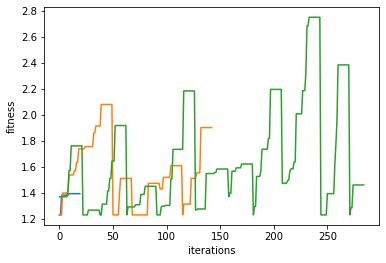

In [684]:
rhc_1 = rand_hill_climb(random_mat, rand_line, 100, 2, 0)
rhc_2 = rand_hill_climb(random_mat, rand_line, 100, 2, 5)
rhc_3 = rand_hill_climb(random_mat, rand_line, 100, 2, 10)

plt.xlabel("iterations")
plt.ylabel("fitness")

curve = plt.plot(range(len(rhc_1[2])), rhc_1[2], range(len(rhc_2[2])), rhc_2[2], range(len(rhc_3[2])), rhc_3[2])

print(rhc_1, rhc_2, rhc_3)

(array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]), 9.311617982167851, array([2.82200946, 3.06842279, 3.36537024, 3.36537024, 3.36537024,
       3.9547383 , 3.9547383 , 4.38777262, 4.38777262, 4.38777262,
       4.38777262, 4.38777262, 4.38777262, 4.38777262, 4.64688679,
       4.64688679, 4.64688679, 4.64688679, 4.64688679, 4.64688679,
       4.83507231, 9.31161798, 9.31161798, 9.31161798, 9.31161798,
       9.31161798, 9.31161798, 9.31161798, 9.31161798, 9.31161798,
       9.31161798, 9.31161798])) (array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 

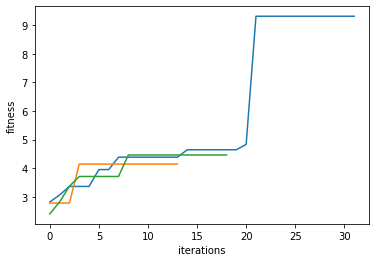

In [685]:
acgt_1 = ticgene(random_mat, rand_line, 100, 2, 0.1)
acgt_2 = ticgene(random_mat, rand_line, 100, 2, 0.3)
acgt_3 = ticgene(random_mat, rand_line, 100, 2, 0.9)

plt.xlabel("iterations")
plt.ylabel("fitness")

curve = plt.plot(range(len(acgt_1[2])), acgt_1[2], range(len(acgt_2[2])), acgt_2[2], range(len(acgt_3[2])), acgt_3[2])

print(acgt_1, acgt_2, acgt_3)

(array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0]), 11.322283028880223, array([ 1.22808957,  1.42789778,  1.42789778, ..., 11.32228303,
       11.32228303, 11.32228303])) (array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]), 11.877957330753196, array([ 1.22808957,  1.29329418,  1.29329418, ..., 11.87795733,
       11.87795733, 11.87795733])) (array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0,

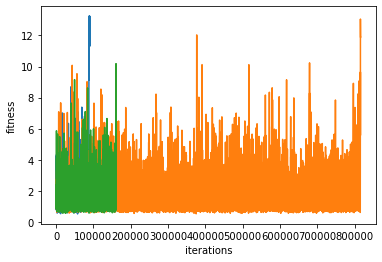

In [687]:
schedule1 = mlrose.GeomDecay(init_temp=10, decay=0.95, min_temp=1)
schedule2 = mlrose.ArithDecay(init_temp=10, decay=0.95, min_temp=1)
schedule3 = mlrose.ExpDecay(init_temp=10, exp_const=0.05, min_temp=1)


sa_1 = sim_anneal(random_mat, rand_line, 100, 2, schedule1)
sa_2 = sim_anneal(random_mat, rand_line, 100, 2, schedule2)
sa_3 = sim_anneal(random_mat, rand_line, 100, 2, schedule3)

plt.xlabel("iterations")
plt.ylabel("fitness")

curve = plt.plot(range(len(sa_1[2])), sa_1[2], range(len(sa_2[2])), sa_2[2], range(len(sa_3[2])), sa_3[2])

print(sa_1, sa_2, sa_3)

(array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]), 12.477576116669335, array([ 3.00790015,  5.09842387,  6.93615144,  8.01177278,  8.01177278,
        8.01177278,  9.73159011, 12.47757612, 12.47757612, 12.47757612,
       12.47757612, 12.47757612, 12.47757612, 12.47757612, 12.47757612,
       12.47757612, 12.47757612, 12.47757612])) (array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]), 13.230753847621145, array([ 4.70331812, 

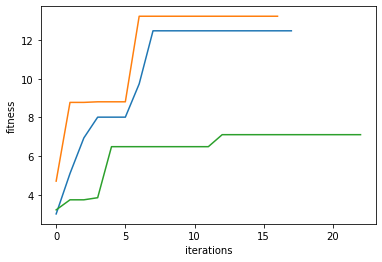

In [688]:
m_1 = mim(random_mat, rand_line, 100, 2, 0.1)
m_2 = mim(random_mat, rand_line, 100, 2, 0.3)
m_3 = mim(random_mat, rand_line, 100, 2, 0.9)

plt.xlabel("iterations")
plt.ylabel("fitness")

curve = plt.plot(range(len(m_1[2])), m_1[2], range(len(m_2[2])), m_2[2], range(len(m_3[2])), m_3[2])

print(m_1, m_2, m_3)

# SIMPLIFIED SUDOKU

(array([8, 4, 4, 5, 4, 5, 2, 0, 1, 2, 8, 1, 8, 3, 7, 4, 7, 5, 4, 2, 5, 6,
       7, 3, 4, 4, 8, 4, 6, 4, 8, 5, 3, 7, 2, 4, 5, 3, 7, 4, 5, 2, 4, 1,
       1, 0, 6, 8, 2, 5, 7, 1, 8, 4, 2, 8, 8, 1, 8, 2, 2, 3, 6, 5, 7, 4,
       1, 8, 3, 0, 7, 7, 3, 2, 4, 8, 2, 2, 3, 3, 5]), 139.0, array([125., 125., 125., 134., 135., 136., 137., 137., 137., 137., 138.,
       138., 138., 138., 138., 138., 138., 139., 139., 139., 139., 139.,
       139., 139., 139., 139., 139., 139.])) (array([0, 4, 4, 6, 4, 5, 2, 7, 1, 2, 8, 1, 8, 3, 6, 4, 7, 5, 4, 2, 5, 6,
       7, 3, 4, 4, 8, 4, 6, 4, 8, 5, 3, 7, 2, 4, 5, 3, 7, 4, 8, 2, 4, 0,
       1, 6, 6, 8, 2, 5, 7, 1, 8, 0, 2, 8, 8, 1, 8, 2, 2, 6, 4, 5, 6, 4,
       1, 8, 3, 8, 7, 7, 6, 2, 4, 8, 1, 2, 3, 3, 5]), 144.0, array([125., 125., 125., 135., 135., 135., 135., 135., 136., 136., 136.,
       136., 136., 136., 136., 136., 136., 137., 138., 138., 138., 138.,
       138., 138., 138., 138., 138., 138., 138., 135., 135., 136., 137.,
       137., 137., 137., 137

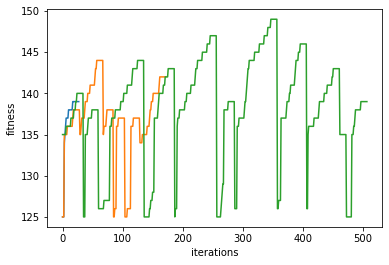

In [689]:
rhc_1 = rand_hill_climb(sudoku, rand_sud, 81, 9, 0)
rhc_2 = rand_hill_climb(sudoku, rand_sud, 81, 9, 5)
rhc_3 = rand_hill_climb(sudoku, rand_sud, 81, 9, 10)

plt.xlabel("iterations")
plt.ylabel("fitness")

curve = plt.plot(range(len(rhc_1[2])), rhc_1[2], range(len(rhc_2[2])), rhc_2[2], range(len(rhc_3[2])), rhc_3[2])

print(rhc_1, rhc_2, rhc_3)

(array([2, 3, 4, 3, 5, 0, 8, 7, 4, 2, 6, 7, 1, 8, 2, 0, 3, 4, 0, 2, 5, 7,
       8, 4, 3, 4, 5, 1, 6, 1, 4, 0, 1, 8, 7, 0, 8, 6, 1, 2, 7, 6, 3, 0,
       7, 3, 4, 0, 2, 5, 8, 5, 3, 2, 7, 6, 3, 0, 5, 1, 2, 4, 8, 7, 6, 5,
       4, 3, 8, 4, 7, 7, 3, 0, 1, 3, 4, 6, 4, 5, 7]), 144.0, array([141., 143., 143., 143., 143., 143., 143., 143., 143., 143., 144.,
       144., 144., 144., 144., 144., 144., 144., 144., 144., 144.])) (array([2, 8, 5, 2, 6, 4, 8, 6, 6, 4, 7, 3, 7, 3, 0, 3, 6, 5, 8, 8, 4, 7,
       0, 7, 2, 1, 3, 0, 5, 7, 3, 8, 1, 2, 3, 4, 0, 1, 8, 8, 1, 8, 2, 6,
       7, 1, 2, 3, 3, 4, 0, 7, 5, 6, 1, 5, 0, 4, 6, 8, 7, 7, 3, 5, 3, 8,
       1, 7, 4, 0, 3, 5, 3, 6, 2, 8, 4, 7, 5, 3, 4]), 143.0, array([142., 142., 142., 142., 142., 142., 142., 142., 143., 143., 143.,
       143., 143., 143., 143., 143., 143., 143., 143.])) (array([8, 7, 0, 4, 7, 1, 7, 3, 2, 5, 0, 6, 7, 8, 4, 2, 3, 4, 8, 0, 6, 2,
       0, 2, 8, 6, 5, 8, 2, 0, 1, 2, 4, 4, 5, 3, 7, 0, 3, 2, 5, 5, 3, 6,
       0, 7, 7, 1, 

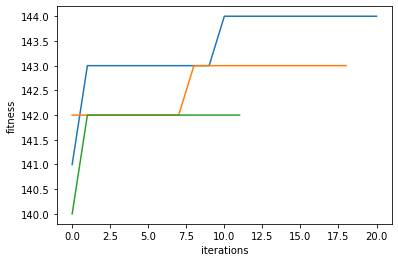

In [690]:
acgt_1 = ticgene(sudoku, rand_sud, 81, 9, 0.1)
acgt_2 = ticgene(sudoku, rand_sud, 81, 9, 0.3)
acgt_3 = ticgene(sudoku, rand_sud, 81, 9, 0.9)

plt.xlabel("iterations")
plt.ylabel("fitness")

curve = plt.plot(range(len(acgt_1[2])), acgt_1[2], range(len(acgt_2[2])), acgt_2[2], range(len(acgt_3[2])), acgt_3[2])

print(acgt_1, acgt_2, acgt_3)

C:\Users\Karan\Anaconda3\lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


(array([7, 0, 6, 5, 3, 8, 2, 5, 1, 5, 1, 3, 6, 2, 0, 4, 7, 6, 6, 2, 5, 3,
       7, 8, 4, 1, 8, 1, 6, 3, 2, 5, 0, 3, 7, 8, 2, 8, 0, 7, 5, 6, 4, 1,
       3, 5, 6, 0, 2, 4, 8, 3, 7, 4, 7, 6, 6, 5, 4, 0, 8, 3, 4, 4, 3, 5,
       6, 7, 1, 0, 4, 8, 3, 6, 2, 8, 4, 7, 0, 1, 5]), 154.0, array([135., 134., 133., 132., 132., 132., 131., 132., 133., 132., 133.,
       133., 133., 134., 135., 135., 135., 136., 136., 135., 135., 136.,
       135., 136., 136., 137., 137., 137., 136., 136., 136., 136., 136.,
       137., 137., 136., 137., 138., 138., 138., 138., 137., 138., 138.,
       138., 138., 138., 138., 138., 138., 138., 138., 138., 138., 138.,
       139., 139., 139., 139., 139., 139., 139., 139., 139., 140., 140.,
       140., 141., 142., 143., 143., 143., 143., 143., 143., 143., 143.,
       143., 143., 143., 143., 143., 143., 143., 143., 143., 143., 143.,
       143., 143., 143., 143., 143., 143., 144., 144., 144., 144., 144.,
       144., 144., 144., 145., 145., 145., 145., 145., 145., 1

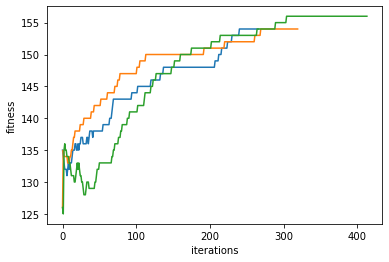

In [697]:
schedule1 = mlrose.GeomDecay(init_temp=10, decay=0.95, min_temp=0.001)
schedule2 = mlrose.ArithDecay(init_temp=10, decay=0.95, min_temp=0.001)
schedule3 = mlrose.ExpDecay(init_temp=10, exp_const=0.05, min_temp=0.001)


sa_1 = sim_anneal(sudoku, rand_sud, 81, 9, schedule1)
sa_2 = sim_anneal(sudoku, rand_sud, 81, 9, schedule2)
sa_3 = sim_anneal(sudoku, rand_sud, 81, 9, schedule3)

plt.xlabel("iterations")
plt.ylabel("fitness")

curve = plt.plot(range(len(sa_1[2])), sa_1[2], range(len(sa_2[2])), sa_2[2], range(len(sa_3[2])), sa_3[2])

print(sa_1, sa_2, sa_3)

(array([7, 0, 2, 5, 6, 4, 7, 6, 8, 5, 3, 6, 2, 7, 8, 1, 4, 1, 5, 4, 6, 8,
       3, 1, 0, 2, 7, 8, 0, 6, 2, 7, 6, 1, 5, 3, 7, 1, 5, 7, 8, 0, 6, 2,
       1, 4, 5, 3, 7, 8, 6, 2, 7, 1, 1, 2, 7, 7, 6, 1, 5, 3, 4, 5, 5, 0,
       6, 1, 7, 3, 8, 2, 7, 3, 4, 1, 6, 2, 0, 8, 5]), 152.0, array([143., 143., 146., 148., 148., 149., 151., 152., 152., 152., 152.,
       152., 152., 152., 152., 152., 152., 152.])) (array([6, 3, 4, 7, 0, 8, 1, 0, 2, 2, 4, 1, 1, 5, 8, 7, 3, 6, 4, 6, 2, 8,
       7, 5, 0, 1, 3, 3, 2, 7, 8, 0, 7, 4, 5, 1, 6, 7, 0, 8, 1, 2, 4, 7,
       2, 4, 5, 3, 0, 1, 8, 6, 7, 0, 3, 1, 4, 4, 7, 6, 8, 2, 7, 6, 7, 2,
       4, 0, 5, 1, 8, 4, 8, 3, 6, 2, 1, 7, 0, 5, 7]), 152.0, array([142., 142., 142., 142., 142., 144., 144., 144., 145., 145., 145.,
       146., 146., 146., 147., 150., 150., 150., 151., 152., 152., 152.,
       152., 152., 152., 152., 152., 152., 152., 152.])) (array([5, 5, 4, 3, 1, 7, 8, 7, 6, 5, 5, 0, 1, 4, 7, 2, 1, 5, 1, 0, 8, 5,
       0, 3, 4, 4, 2, 7, 2, 1, 1, 6, 

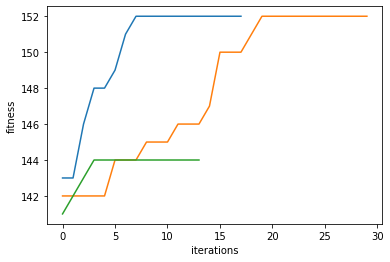

In [791]:
m_1 = mim(sudoku, rand_sud, 81, 9, 0.1)
m_2 = mim(sudoku, rand_sud, 81, 9, 0.3)
m_3 = mim(sudoku, rand_sud, 81, 9, 0.9)

plt.xlabel("iterations")
plt.ylabel("fitness")

curve = plt.plot(range(len(m_1[2])), m_1[2], range(len(m_2[2])), m_2[2], range(len(m_3[2])), m_3[2])

print(m_1, m_2, m_3)

## N-QUEENS

In [812]:
state = np.random.randint(0, 99, 100)
prob = mlrose.DiscreteOpt(length = 100, fitness_fn = mlrose.Queens(), maximize = False, max_val = 99)

(array([84, 27, 97, 80, 95, 81, 73, 85,  1, 32, 35, 24, 21, 59, 32, 18, 11,
       83, 73,  8, 35,  9, 10, 92, 37, 85, 56, 39, 22, 76, 44, 63, 84, 65,
       71, 15,  7,  5, 74, 81,  4,  6, 77, 64, 30, 23, 51, 31,  7, 24, 40,
       62, 36,  7, 82, 79, 48, 42, 57,  3, 38, 89, 63, 14, 74, 73, 45, 93,
       46, 24, 12, 87, 59, 12, 81, 92, 67, 56, 49, 14, 55, 53, 14, 34, 44,
       61, 68, 53, 51, 29, 42, 15, 91, 91, 76, 13, 80, 50, 26, 60]), 65.0, array([-107., -106., -106., -103., -103., -103., -101., -101.,  -99.,
        -99.,  -99.,  -98.,  -98.,  -98.,  -98.,  -98.,  -98.,  -98.,
        -98.,  -98.,  -98.,  -96.,  -95.,  -95.,  -95.,  -94.,  -92.,
        -89.,  -89.,  -88.,  -88.,  -88.,  -88.,  -86.,  -85.,  -84.,
        -84.,  -82.,  -82.,  -81.,  -81.,  -77.,  -75.,  -74.,  -73.,
        -73.,  -73.,  -73.,  -73.,  -73.,  -72.,  -72.,  -71.,  -71.,
        -71.,  -71.,  -71.,  -71.,  -71.,  -71.,  -71.,  -71.,  -68.,
        -68.,  -67.,  -66.,  -66.,  -65.,  -65.,  -65.,  -6

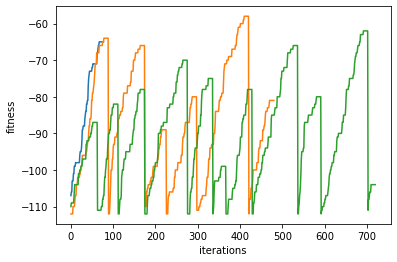

In [813]:
rhc_1 = mlrose.random_hill_climb(problem = prob, init_state=state, curve = True, restarts = 0)
rhc_2 = mlrose.random_hill_climb(problem = prob, init_state=state, curve = True, restarts = 5)
rhc_3 = mlrose.random_hill_climb(problem = prob, init_state=state, curve = True, restarts = 10)

plt.xlabel("iterations")
plt.ylabel("fitness")

curve = plt.plot(range(len(rhc_1[2])), rhc_1[2], range(len(rhc_2[2])), rhc_2[2], range(len(rhc_3[2])), rhc_3[2])

print(rhc_1, rhc_2, rhc_3)

(array([21, 57, 31, 56, 28, 36, 44,  3, 54, 23, 57, 24, 90, 33, 43, 80, 18,
       46, 69,  7, 69, 16, 12, 42, 93, 92, 25, 26, 14, 32, 55, 34, 94, 30,
       86, 80, 17, 11, 22, 35, 94, 49, 37, 75, 64, 93, 68,  7, 61, 59, 16,
       42, 47, 26, 10, 32, 45, 43, 13, 62,  5, 97,  0, 79, 66, 86, 78, 49,
       72, 74, 89, 81, 53, 77, 66,  4, 96, 73, 32, 20, 33,  5, 37, 75, 50,
       36,  5, 11, 80, 48, 73, 64, 40, 61, 88, 12, 45, 15,  1, 62]), 85.0, array([-89., -85., -85., -85., -85., -85., -85., -85., -85., -85., -85.,
       -85.])) (array([35, 19, 22, 76, 38, 29, 94, 80, 98, 14, 55, 28, 70, 50, 61, 72,  2,
       36, 81,  3, 96, 11, 92, 88, 90, 94, 98, 61, 28, 12, 74, 49, 88, 43,
       33, 41, 89, 73, 41, 65, 35, 77, 16, 85, 72, 46, 85, 47, 32,  9, 68,
       60, 32, 96, 86,  0, 82, 31, 62, 19, 67, 97, 95, 93, 51,  7, 51,  4,
       45, 24, 77, 53, 63, 71, 60, 94, 86,  9, 15, 34, 29, 46, 15, 53, 91,
        4, 65, 79, 24, 12,  0, 80, 16, 68, 54, 68, 49, 53, 37, 89]), 79.0, array([-95

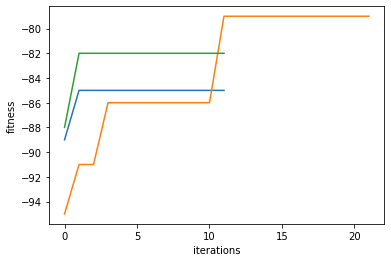

In [814]:
acgt_1 = mlrose.genetic_alg(problem = prob, curve = True, mutation_prob = 0.1)
acgt_2 = mlrose.genetic_alg(problem = prob, curve = True, mutation_prob = 0.3)
acgt_3 = mlrose.genetic_alg(problem = prob, curve = True, mutation_prob = 0.9)

plt.xlabel("iterations")
plt.ylabel("fitness")

curve = plt.plot(range(len(acgt_1[2])), acgt_1[2], range(len(acgt_2[2])), acgt_2[2], range(len(acgt_3[2])), acgt_3[2])

print(acgt_1, acgt_2, acgt_3)

(array([91, 86,  3, 54, 60, 39, 44, 90, 86, 82, 35, 48, 16, 85, 87, 43, 74,
       78, 18, 22,  9, 34, 87,  1,  1, 89, 29, 84, 57, 96,  4, 84, 75,  5,
       36, 53, 71, 37, 18, 61, 95,  7, 81, 97,  2, 27, 30, 35, 15, 13, 83,
        9, 59, 79, 38, 48, 68, 43, 50, 65, 62, 20, 42, 10, 25, 68,  8, 84,
       78, 96, 12, 70, 97, 93,  3, 69, 49, 85, 84,  5, 26, 75, 47, 44, 63,
       47,  0,  6, 24, 16, 66,  4, 46, 98, 34, 31, 81, 54, 77, 14]), 60.0, array([-111., -110., -110., -113., -113., -114., -113., -112., -111.,
       -111., -111., -109., -108., -108., -108., -105., -104., -105.,
       -105., -105., -101., -102., -102., -102., -103., -102., -102.,
       -102., -102., -103., -103., -105., -105., -106., -105., -107.,
       -107., -108., -108., -108., -109., -109., -109., -109., -109.,
       -109., -109., -108., -106., -106., -105., -105., -105., -104.,
       -104., -104., -104., -105., -105., -106., -103., -103., -103.,
       -103., -101., -100.,  -98.,  -98.,  -98.,  -97.,  -9

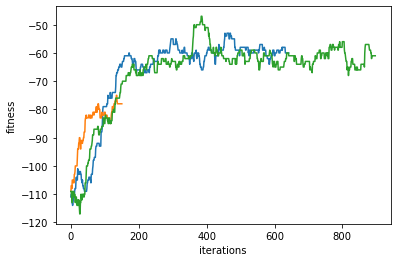

In [815]:
schedule1 = mlrose.GeomDecay(init_temp=10, decay=0.95, min_temp=1)
schedule2 = mlrose.ArithDecay(init_temp=10, decay=0.95, min_temp=1)
schedule3 = mlrose.ExpDecay(init_temp=10, exp_const=0.05, min_temp=1)

sa_1 = mlrose.simulated_annealing(problem = prob, init_state = state, curve = True, schedule = schedule1)
sa_2 = mlrose.simulated_annealing(problem = prob, init_state = state, curve = True, schedule = schedule2)
sa_3 = mlrose.simulated_annealing(problem = prob, init_state = state, curve = True, schedule = schedule3)

plt.xlabel("iterations")
plt.ylabel("fitness")

curve = plt.plot(range(len(sa_1[2])), sa_1[2], range(len(sa_2[2])), sa_2[2], range(len(sa_3[2])), sa_3[2])

print(sa_1, sa_2, sa_3)


(array([49, 48, 57, 38, 41, 20, 38, 17, 88, 65, 27, 62, 24, 58, 89, 76, 54,
       18, 42, 10, 54, 25, 11, 71, 49, 22, 69, 31, 25, 75, 78, 66, 91, 45,
       82, 37, 81, 84, 67, 19, 30, 14, 93, 80, 50,  9, 77, 33, 18, 15, 48,
       61,  1, 79, 71,  2, 35, 75, 30,  9, 26, 53, 56, 12, 67, 55, 51, 66,
       25, 44,  0,  4, 79,  3,  9, 37, 27, 59, 15, 58,  7, 18, 27, 70, 94,
       58, 57, 44, 57, 97,  2, 96,  6, 36, 15, 45,  2, 59, 43, 85]), 90.0, array([-90., -90., -90., -90., -90., -90., -90., -90., -90., -90., -90.])) (array([74, 69, 90, 74, 77, 72, 51, 13, 68,  3, 62,  0, 81, 42,  3, 50, 55,
       94, 52,  0,  2, 37, 64,  2,  8, 36, 60, 39, 91, 83, 85, 32, 70,  1,
        9, 10, 22, 52, 60, 87, 12, 62, 42, 47, 43, 59, 62,  1, 35, 87, 68,
       44,  4, 94, 96, 85, 85, 49,  4, 96, 80, 46, 35, 37, 48, 26, 51, 75,
       73, 13, 21, 74, 67, 78, 62, 29, 58, 84, 27, 51, 54, 13, 30, 78, 47,
       59, 12,  6, 94, 17, 24, 75, 61, 20,  9, 89,  6, 45, 41, 87]), 87.0, array([-87., -87., -87.

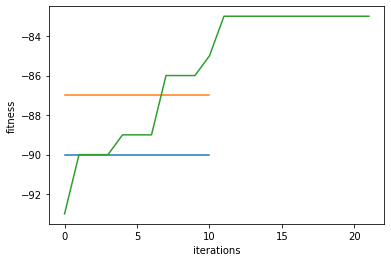

In [816]:
m_1 = mlrose.mimic(problem = prob, curve = True, keep_pct = 0.1)
m_2 = mlrose.mimic(problem = prob, curve = True, keep_pct = 0.3)
m_3 = mlrose.mimic(problem = prob, curve = True, keep_pct = 0.9)

plt.xlabel("iterations")
plt.ylabel("fitness")

curve = plt.plot(range(len(m_1[2])), m_1[2], range(len(m_2[2])), m_2[2], range(len(m_3[2])), m_3[2])

print(m_1, m_2, m_3)

## Diabetes Neural Network

In [626]:
path = 'C:/Users/Karan/Desktop/OMSCS/CS7641/Assignment 2'
df = pd.read_csv(path + '/diabetes.csv')
df_out = df['Outcome']
df_features = df.drop('Outcome', axis = 1)

df_out.head(10)

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [627]:
def splitData(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
#    print(np.shape(x_train), np.shape(y_train), np.shape(x_test), np.shape(y_test))
    return x_train, x_test, y_train, y_test

In [809]:
def NNet(x, y):
    x_train, x_test, y_train, y_test = splitData(x, y)
    
    hidden_layer_sizes = (50, 2) #default=(100,)
    activation = 'relu' #{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
    solver = 'adam' #{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
    alpha = 1e-3 #default=0.0001
    batch_size = 'auto' #default=’auto’
    learning_rate = 'invscaling' #{‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
    
    scaler = MinMaxScaler()

    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    # One hot encode target values
    one_hot = OneHotEncoder()

    y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
    y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()
    
    nn_model_rhc_1 = mlrose.NeuralNetwork(hidden_nodes = [300], activation = 'tanh', algorithm = 'random_hill_climb', max_iters = 200, bias = True, is_classifier = True, learning_rate = 1, early_stopping = True, clip_max = 5, max_attempts = 100, random_state = 3)
    nn_model_rhc_1.fit(x_train_scaled, y_train_hot)
    
    nn_model_sa_1 = mlrose.NeuralNetwork(hidden_nodes = [300], activation = 'tanh', algorithm = 'simulated_annealing', max_iters = 200, bias = True, is_classifier = True, learning_rate = 1, early_stopping = True, clip_max = 5, max_attempts = 100, random_state = 3)
    nn_model_sa_1.fit(x_train_scaled, y_train_hot)
    
    nn_model_ga_1 = mlrose.NeuralNetwork(hidden_nodes = [300], activation = 'tanh', algorithm = 'genetic_alg', max_iters = 200, bias = True, is_classifier = True, learning_rate = 1, early_stopping = True, clip_max = 5, max_attempts = 100, random_state = 3)
    nn_model_ga_1.fit(x_train_scaled, y_train_hot)
    
    nn_model_gd = mlrose.NeuralNetwork(hidden_nodes = [300], activation = 'tanh', algorithm = 'gradient_descent', max_iters = 200, bias = True, is_classifier = True, learning_rate = 1, early_stopping = True, clip_max = 5, max_attempts = 100, random_state = 3)
    nn_model_gd.fit(x_train_scaled, y_train_hot)
    
    from sklearn.metrics import accuracy_score

# Predict labels for train set and assess accuracy
    y_train_pred_rhc = nn_model_rhc_1.predict(x_train_scaled)
    y_train_pred_sa = nn_model_sa_1.predict(x_train_scaled)
    y_train_pred_ga = nn_model_ga_1.predict(x_train_scaled)
    y_train_pred_gd = nn_model_gd.predict(x_train_scaled)


    y_train_accuracy_rhc = accuracy_score(y_train_hot, y_train_pred_rhc)
    y_train_accuracy_sa = accuracy_score(y_train_hot, y_train_pred_sa)
    y_train_accuracy_ga = accuracy_score(y_train_hot, y_train_pred_ga)
    y_train_accuracy_gd = accuracy_score(y_train_hot, y_train_pred_gd)

    acc_train = [y_train_accuracy_rhc, y_train_accuracy_sa, y_train_accuracy_ga, y_train_accuracy_gd]

# Predict labels for test set and assess accuracy
    y_test_pred_rhc = nn_model_rhc_1.predict(x_test_scaled)
    y_test_pred_sa = nn_model_sa_1.predict(x_test_scaled)
    y_test_pred_ga = nn_model_ga_1.predict(x_test_scaled)
    y_test_pred_gd = nn_model_gd.predict(x_test_scaled)

    y_test_accuracy_rhc = accuracy_score(y_test_hot, y_test_pred_rhc)
    y_test_accuracy_sa = accuracy_score(y_test_hot, y_test_pred_sa)
    y_test_accuracy_ga = accuracy_score(y_test_hot, y_test_pred_ga)
    y_test_accuracy_gd = accuracy_score(y_test_hot, y_test_pred_gd)

    acc_test = [y_test_accuracy_rhc, y_test_accuracy_sa, y_test_accuracy_ga, y_test_accuracy_gd]

#    nn = MLPRegressor(solver=solver, alpha=alpha, hidden_layer_sizes=hidden_layer_sizes, activation = activation, batch_size = batch_size, learning_rate = learning_rate, random_state=1)
#    nn.fit(x_train, y_train)
#    y_predict = nn.predict(x_test)
#    print([y_predict[0:100], y_test[0:100]])
#    scores = cross_val_score(nn, x, y, cv=5)

    return acc_train, acc_test

scoresNN = NNet(df_features, df_out)
print("nn: ", scoresNN)

nn:  ([0.5642458100558659, 0.2886405959031657, 0.7001862197392924, 0.48789571694599626], [0.5194805194805194, 0.329004329004329, 0.6320346320346321, 0.4675324675324675])
